In [2]:
import pandas as pd
import networkx as nx
phases = {}
graphs = {}
nodes_count = []
edges_count = []
for i in range(1,12): 
  var_name = "phase" + str(i)
  file_name = "https://raw.githubusercontent.com/ragini30/Networks-Homework/main/" + var_name + ".csv"
  phases[i] = pd.read_csv(file_name, index_col = ["players"])
  phases[i].columns = "n" + phases[i].columns
  phases[i].index = phases[i].columns
  phases[i][phases[i] > 0] = 1
  graphs[i] = nx.from_pandas_adjacency(phases[i])
  graphs[i].name = var_name
  nodes_count.append(graphs[i].number_of_nodes())
  edges_count.append(graphs[i].number_of_edges())


In [1]:
import matplotlib.pyplot as plt

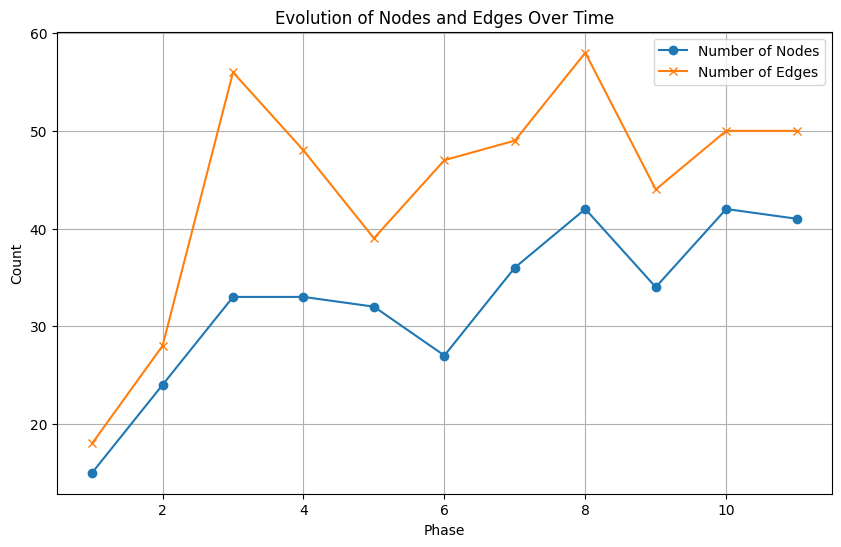

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 12), nodes_count, label='Number of Nodes', marker='o')
plt.plot(range(1, 12), edges_count, label='Number of Edges', marker='x')

# Add labels and title
plt.xlabel('Phase')
plt.ylabel('Count')
plt.title('Evolution of Nodes and Edges Over Time')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [6]:
print(graphs[1])

Graph named 'phase1' with 15 nodes and 18 edges


In [7]:
node_bc_sums = {}

# Calculate the betweenness centrality for each node in each graph and accumulate the values
for G in graphs:
    betweenness_centrality = nx.betweenness_centrality(graphs[G])
    for node, bc_value in betweenness_centrality.items():
        if node in node_bc_sums:
            node_bc_sums[node] += bc_value
        else:
            node_bc_sums[node] = bc_value

# Compute the mean betweenness centrality for each node across the 11 graphs
mean_betweenness_centrality = {node: bc_sum / len(graphs) for node, bc_sum in node_bc_sums.items()}

# Sort nodes by their mean betweenness centrality in descending order
sorted_nodes = sorted(mean_betweenness_centrality, key=mean_betweenness_centrality.get, reverse=True)

# Get the top three nodes with the highest mean betweenness centrality
top_three_nodes = sorted_nodes[:3]

# Print the results
for i, node in enumerate(top_three_nodes):
    print(f"Top Node {i + 1}: {node}, Mean Betweenness Centrality: {mean_betweenness_centrality[node]}")


Top Node 1: n1, Mean Betweenness Centrality: 0.655050992293228
Top Node 2: n12, Mean Betweenness Centrality: 0.16756212382251084
Top Node 3: n3, Mean Betweenness Centrality: 0.12940285961873224


In [8]:
node_bc_sums = {}

# Calculate the betweenness centrality for each node in each graph and accumulate the values
for G in graphs:
    betweenness_centrality = nx.eigenvector_centrality(graphs[G])
    for node, bc_value in betweenness_centrality.items():
        if node in node_bc_sums:
            node_bc_sums[node] += bc_value
        else:
            node_bc_sums[node] = bc_value

# Compute the mean betweenness centrality for each node across the 11 graphs
mean_betweenness_centrality = {node: bc_sum / len(graphs) for node, bc_sum in node_bc_sums.items()}

# Sort nodes by their mean betweenness centrality in descending order
sorted_nodes = sorted(mean_betweenness_centrality, key=mean_betweenness_centrality.get, reverse=True)

# Get the top three nodes with the highest mean betweenness centrality
top_three_nodes = sorted_nodes[:3]

# Print the results
for i, node in enumerate(top_three_nodes):
    print(f"Top Node {i + 1}: {node}, Mean Betweenness Centrality: {mean_betweenness_centrality[node]}")


Top Node 1: n1, Mean Betweenness Centrality: 0.5463910796025788
Top Node 2: n3, Mean Betweenness Centrality: 0.2980946631382842
Top Node 3: n85, Mean Betweenness Centrality: 0.1906118157991998
